### The Objective of this jupyter notebook is identify in wich time of the year is most expensive rent a airbnb in seattle

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

seattle_calendar = pd.read_csv('./Seattle/calendar.csv')
seattle_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2318,2019-09-22,t,$475.00,$475.00,30,1000
1,2318,2019-09-23,t,$475.00,$475.00,30,1000
2,2318,2019-09-24,t,$475.00,$475.00,30,1000
3,2318,2019-09-25,f,$475.00,$475.00,30,1000
4,2318,2019-09-26,f,$475.00,$475.00,30,1000


#### We have a cuple of problems here, our price is an string with the character of dolar "$" before, and our date is an string we have to format to date. 

In [3]:
seattle_calendar["price"].value_counts

<bound method IndexOpsMixin.value_counts of 0          $475.00
1          $475.00
2          $475.00
3          $475.00
4          $475.00
            ...   
3299595    $100.00
3299596    $100.00
3299597    $100.00
3299598    $100.00
3299599    $100.00
Name: price, Length: 3299600, dtype: object>

#### We have to convert to datetime the "date" value in our dataset because currently is string.

In [4]:
seattle_calendar["date_format"] = pd.to_datetime(seattle_calendar['date'], format='%Y-%m-%d')
seattle_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,date_format
0,2318,2019-09-22,t,$475.00,$475.00,30,1000,2019-09-22
1,2318,2019-09-23,t,$475.00,$475.00,30,1000,2019-09-23
2,2318,2019-09-24,t,$475.00,$475.00,30,1000,2019-09-24
3,2318,2019-09-25,f,$475.00,$475.00,30,1000,2019-09-25
4,2318,2019-09-26,f,$475.00,$475.00,30,1000,2019-09-26


#### The next step is remove the dolar character from the price, to do this we will split the price in two columns and then we will insert into our dataset again, just the price, after that we will conver the price value in float type. 

In [5]:
seattle_calendar_splited = seattle_calendar
price_splited= seattle_calendar_splited["price"].str.split("$", n = 1, expand = True)


In [6]:
seattle_calendar_splited["total_price"] = price_splited[1]
seattle_calendar_splited["total_price"] = seattle_calendar_splited["total_price"].str.replace(',', '').astype(float)
seattle_calendar_splited.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,date_format,total_price
0,2318,2019-09-22,t,$475.00,$475.00,30,1000,2019-09-22,475.0
1,2318,2019-09-23,t,$475.00,$475.00,30,1000,2019-09-23,475.0
2,2318,2019-09-24,t,$475.00,$475.00,30,1000,2019-09-24,475.0
3,2318,2019-09-25,f,$475.00,$475.00,30,1000,2019-09-25,475.0
4,2318,2019-09-26,f,$475.00,$475.00,30,1000,2019-09-26,475.0


#### Now we have our price in a new column called total_price, with the type float.

In [7]:
seattle_calendar_splited = seattle_calendar_splited.drop(columns=["listing_id","date","available","minimum_nights","maximum_nights"])
seattle_calendar_splited.head()

,price,adjusted_price,date_format,total_price
0,$475.00,$475.00,2019-09-22,475.0
1,$475.00,$475.00,2019-09-23,475.0
2,$475.00,$475.00,2019-09-24,475.0
3,$475.00,$475.00,2019-09-25,475.0
4,$475.00,$475.00,2019-09-26,475.0


In [8]:
seattle_calendar_splited.total_price.mean()

155.67198690750394

#### We have to verify the percentaje of NA's in our dataset.

In [13]:
seattle_calendar_splited['date_format'].isna().mean()

0.0

#### And plot our time series with the mean of price. 

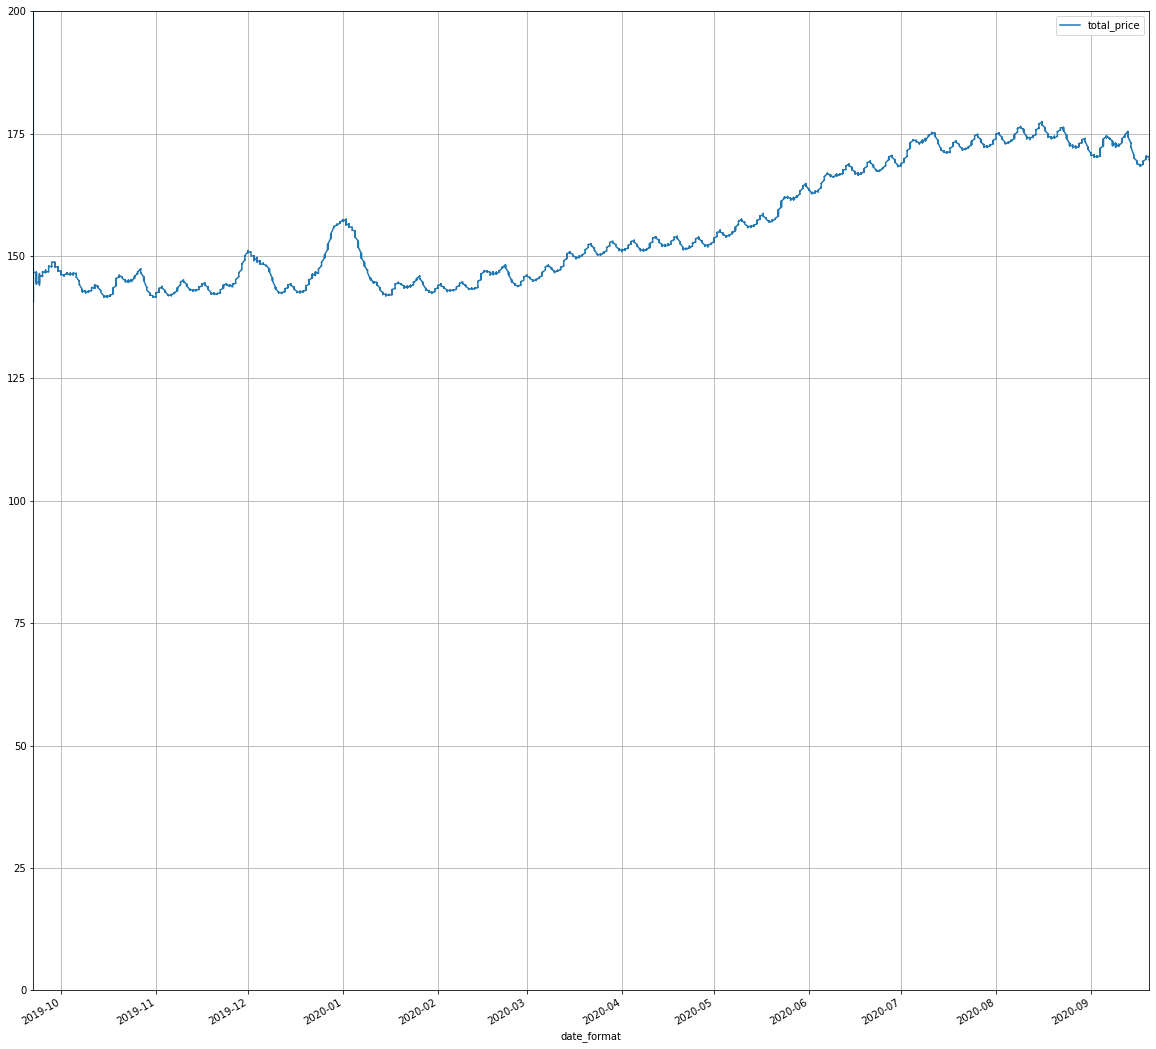

In [11]:

seattle_calendar_splited_date = seattle_calendar_splited
seattle_calendar_splited_date['date_format'] = seattle_calendar_splited_date.apply(lambda row: pd.Timestamp(row.date_format), axis=1 )
seattle_calendar_splited_date = seattle_calendar_splited_date.set_index(seattle_calendar_splited_date.date_format).drop('date_format', axis=1)
seattle_calendar_splited_date.sort_index(inplace=True)

seattle_calendar_splited_date.rolling('10d').mean().plot(figsize=(20,20),ylim =(0, 200), grid='true')

#### As a conclusion we can said that in December  is our most expensive month of 2019.
#### The 2020 Yer will have an increase of about 25 dollars the cost of airbnb in seattle.
#### The most expensive month of 2020 will be august. We have to mention that the dataset that we have dont cover all the 2020 year.